

**<center>Global Renewable Energy Production</center>**

The transition towards renewable energy sources has become an imperative as the world grapples with the challenges of climate change and the need for sustainable energy solutions. To gain a deeper understanding of the global landscape of renewable energy production, this notebook presents a comprehensive exploratory data analysis (EDA) that sheds light on key trends, patterns, and insights within the renewable energy sector.

The objective of this analysis is to provide a holistic overview of renewable energy production, encompassing various aspects such as temporal trends, distribution across different energy types, and the contributions of leading countries. By leveraging descriptive statistics and data visualization techniques, I aim to uncover valuable insights that can inform policymakers, investors, stakeholders and anyone who is involved in the renewable energy sector.

The EDA process begins by examining the dataset, capturing pertinent information related to renewable energy production. Descriptive statistics, generated using the 'describe' method, facilitate a thorough understanding of the central tendency, dispersion, and shape of the distribution within the dataset. These statistics lay the groundwork for further analysis, allowing us to identify key characteristics and trends.

One of the focal points of our analysis is to explore the temporal trends in renewable energy production. Line plots are employed to visualize the changes in production over time for each renewable energy type. This analysis provides a comprehensive view of how the production of renewable energy has evolved, highlighting any significant increases or decreases.

Additionally, we delve into the renewable energy production at a country level. By creating a new column representing the total production of all renewable energy types for each country, we rank the countries based on their contributions to renewable energy production. Bar plots are used to visually present the top countries, providing insights into their relative positions and contributions.

Throughout the analysis, a particular emphasis is placed on hydroelectric power, wind power, and solar power—the most prevalent forms of renewable energy. By examining the production trends and patterns of these energy types, we can gain a deeper understanding of their respective roles and contributions within the global renewable energy landscape.

By conducting this EDA, I aim to contribute to the existing knowledge and understanding of renewable energy production worldwide. The insights gained from this analysis can guide decision-making processes, policy formulation, investment strategies, and future efforts aimed at promoting renewable energy production and achieving sustainability goals.

With the urgency of addressing climate change and adopting sustainable energy practices, this exploratory analysis sets the foundation for further research and action in the critical field of renewable energy production.

In [43]:
#Importing the necessary packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import plotly.graph_objects as go

**Importing the dataset**

In [44]:
# Load the dataset
df = pd.read_csv('renewable.csv')

In [45]:
df.head()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


In [46]:
#Determine the shape of dataset 
df.shape

(8851, 7)

In [47]:
# Check for duplicate values
df.duplicated().sum()


0

**There are several datapoints entered as a continent name or  `Other` in the dataset. We need to remove them**

In [48]:
#
entities_to_drop = ['Other', 'North America', 'South America', 'Oceania', 'World', 'Africa']
df = df[~df['Entity'].isin(entities_to_drop)]

'''
The rows with the specified data-points are dropped permanently

'''


'\nThe rows with the specified data-points are dropped permanently\n\n'

In [49]:
df.shape

(8566, 7)

## Data Cleaning 

The data cleaning process involves removing unnecessary columns and rows from the dataset. The 'Code' column, which does not provide any meaningful information for the analysis, will be dropped. Rows that contain 'World' or 'Other' in the 'Entity' column, which represent aggregate data rather than individual countries, wil also be removed. The dataset is then checked for missing values, and any rows with missing values are dropped to ensure the accuracy of the analysis

In [50]:
df.isna().sum()

Entity                                           0
Code                                          1327
Year                                             0
Electricity from wind (TWh)                    154
Electricity from hydro (TWh)                    11
Electricity from solar (TWh)                   150
Other renewables including bioenergy (TWh)     214
dtype: int64

In [51]:
del df['Code']

In [52]:
df.dropna(inplace=True)

In [53]:
df.isna().sum()

Entity                                        0
Year                                          0
Electricity from wind (TWh)                   0
Electricity from hydro (TWh)                  0
Electricity from solar (TWh)                  0
Other renewables including bioenergy (TWh)    0
dtype: int64

In [54]:
df.head()

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,2000,0.0,0.31,0.0,0.0
1,Afghanistan,2001,0.0,0.50,0.0,0.0
2,Afghanistan,2002,0.0,0.56,0.0,0.0
3,Afghanistan,2003,0.0,0.63,0.0,0.0
4,Afghanistan,2004,0.0,0.56,0.0,0.0


**Renewable energy generation by continent**

    In order to obtain each continent's energy generation, we need to map each country to its respective continent. To do this, we need to create a new column called `continent` in the dataset. 

In [55]:

# Function to convert country to continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'Other'

# Apply function to 'Entity' column to create 'Continent' column
df['Continent'] = df['Entity'].apply(country_to_continent)

# Display the updated dataframe
df.head()

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent
0,Afghanistan,2000,0.0,0.31,0.0,0.0,Asia
1,Afghanistan,2001,0.0,0.50,0.0,0.0,Asia
2,Afghanistan,2002,0.0,0.56,0.0,0.0,Asia
3,Afghanistan,2003,0.0,0.63,0.0,0.0,Asia
4,Afghanistan,2004,0.0,0.56,0.0,0.0,Asia


Now, let's perform some exploratory data analysis (EDA) on this updated dataset for each continent. We'll start by grouping the data by 'Continent' and summarizing the total renewable energy production for each continent.

TODO:

    - Group the data by 'Continent'.
    - Sum the energy production columns for each group.
    - Display the summarized data.

In [56]:
# Group by 'Continent' and sum the energy production columns
continent_summary = df.groupby('Continent')[['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']].sum()

# Display the summarized data
continent_summary

,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
Continent,,,,
Africa,127.462000,2508.895477,72.610000,127.164000
Asia,4186.309872,37640.331656,2346.849399,3340.559730
Europe,4985.928783,32607.996690,1539.456131,3652.829438
North America,3431.542096,34343.820299,811.824781,3782.483405
Oceania,205.776679,2028.322103,111.093150,296.213972
Other,95792.496098,689051.414017,34997.277551,76112.279245
South America,469.076632,21471.152367,90.890043,1023.412829


It appears in the continent column, we have a datapoint mapped to `Other`. As there is no such a continent, we need to remove this and refine our dataset accordingly. 

In [57]:
df = df[df['Continent'] != 'Other']


In [58]:
continent_summary = continent_summary.drop(['Other'], axis=0)

In [59]:
continent_summary

,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
Continent,,,,
Africa,127.462000,2508.895477,72.610000,127.164000
Asia,4186.309872,37640.331656,2346.849399,3340.559730
Europe,4985.928783,32607.996690,1539.456131,3652.829438
North America,3431.542096,34343.820299,811.824781,3782.483405
Oceania,205.776679,2028.322103,111.093150,296.213972
South America,469.076632,21471.152367,90.890043,1023.412829


In [60]:

# Function to convert country to continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'Other'

# Apply the function to the 'Country' column
df['Continent'] = df['Entity'].apply(country_to_continent)
df.head()

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Continent
0,Afghanistan,2000,0.0,0.31,0.0,0.0,Asia
1,Afghanistan,2001,0.0,0.50,0.0,0.0,Asia
2,Afghanistan,2002,0.0,0.56,0.0,0.0,Asia
3,Afghanistan,2003,0.0,0.63,0.0,0.0,Asia
4,Afghanistan,2004,0.0,0.56,0.0,0.0,Asia


In [ ]:
# Summary statistics for renewable energy production
df.describe()


,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
count,6952.000000,6952.000000,6952.000000,6952.000000,6952.000000
mean,2000.729430,1.928380,18.786035,0.715294,1.758151
std,15.463659,17.516614,67.094117,7.882550,7.507626
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.020000,0.000000,0.000000
50%,2004.000000,0.000000,1.565500,0.000000,0.000000
75%,2013.000000,0.010000,9.852500,0.002000,0.360000
max,2022.000000,655.600000,1321.710000,327.000000,169.931580


In [62]:
continent_summary.describe()

,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
count,6.000000,6.000000,6.000000,6.000000
mean,2234.349344,21766.753099,828.787251,2037.110562
std,2212.911154,16051.441034,942.468229,1735.629769
min,127.462000,2028.322103,72.610000,127.164000
25%,271.601668,7249.459699,95.940820,478.013686
50%,1950.309364,27039.574529,461.458965,2181.986279
75%,3997.617928,33909.864397,1357.548294,3574.762011
max,4985.928783,37640.331656,2346.849399,3782.483405


Here are the summary statistics for our data:

Year: The data spans from 1965 to 2022.
Electricity from wind (TWh): The average electricity production from wind is about 1.89 TWh, with a maximum of 655.6 TWh.
Electricity from hydro (TWh): The average electricity production from hydro is about 18.46 TWh, with a maximum of 1321.71 TWh.
Electricity from solar (TWh): The average electricity production from solar is about 0.70 TWh, with a maximum of 327 TWh.
Other renewables including bioenergy (TWh): The average electricity production from other renewable sources, including bioenergy, is about 1.72 TWh, with a maximum of 169.93 TWh.
These statistics give us a general understanding of the distribution of renewable energy production across different sources. Next, let's visualize these distributions to gain more insights.

## Visualizing the Distribution of Renewable Energy Production

To better understand the distribution of renewable energy production, we'll create histograms for each type of renewable energy source. Histograms are a great way to visualize the distribution of numerical data.

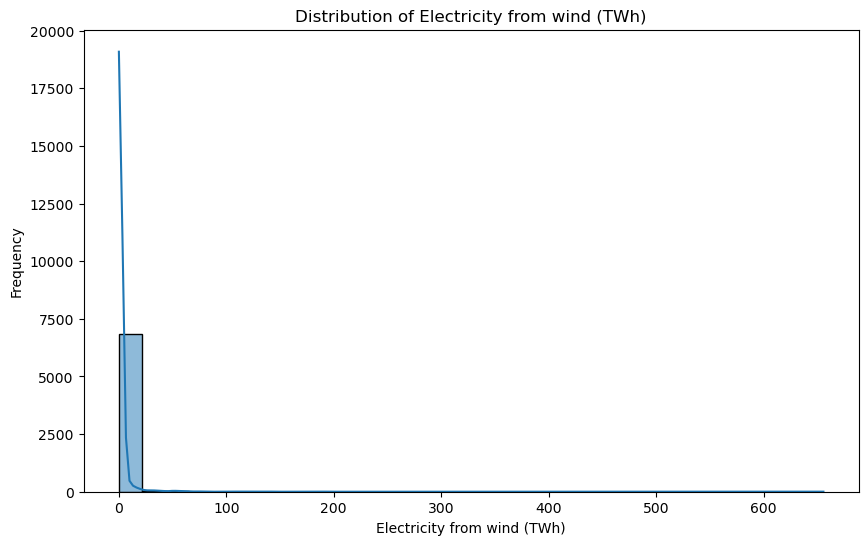

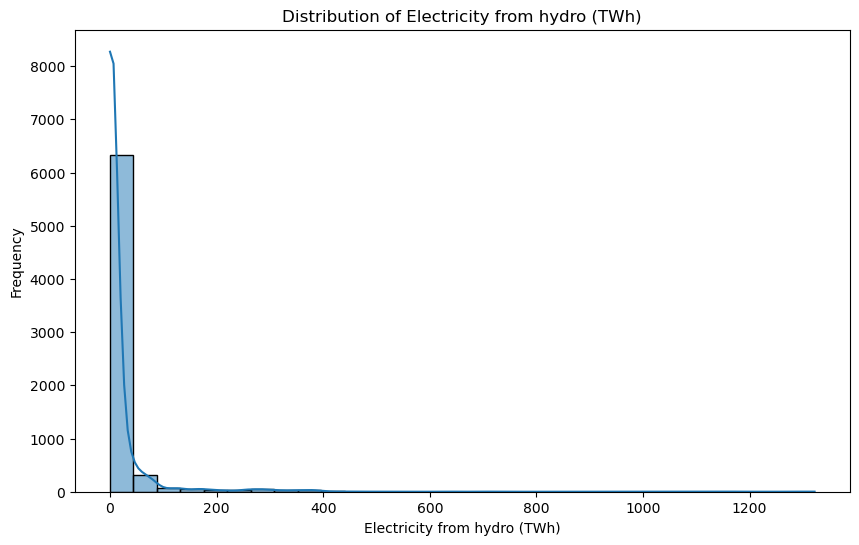

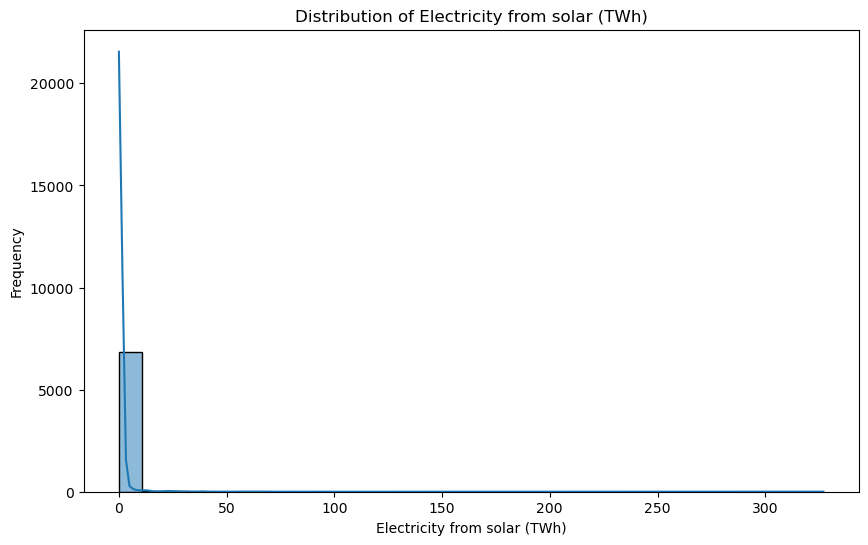

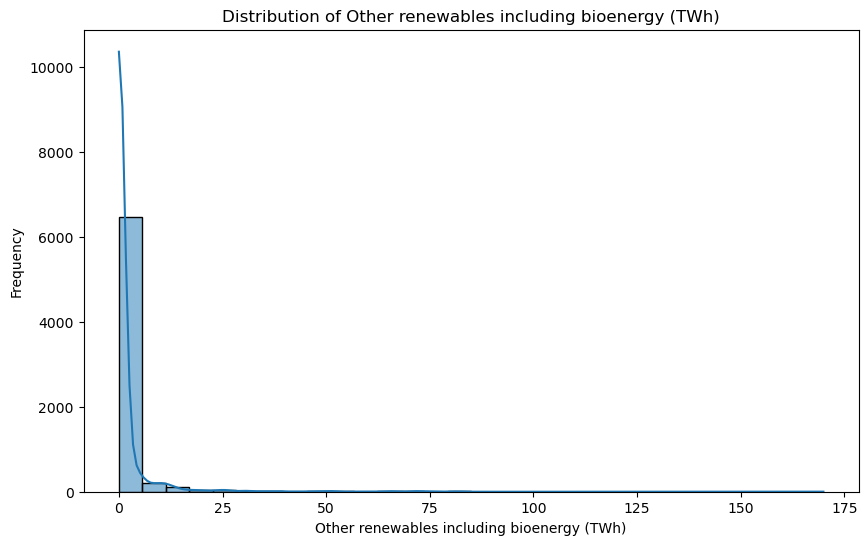

In [63]:
# Plot histograms for each type of renewable energy
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

for energy_type in energy_types:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[energy_type], bins=30, kde=True)
    plt.title(f'Distribution of {energy_type}')
    plt.xlabel(energy_type)
    plt.ylabel('Frequency')
    plt.show()


From these histograms, we can see that the distributions of renewable energy production are highly skewed to the right, indicating that most countries have relatively low levels of renewable energy production. However, there are a few countries with very high levels of production, especially for hydro and wind energy.

Next, let's examine the trends in renewable energy production over time.

## Trends in Renewable Energy Production Over Time

Next, let's examine how the production of each type of renewable energy has changed over time. We'll create line plots to visualize these trends.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16508\1606411884.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('Year').sum().reset_index()


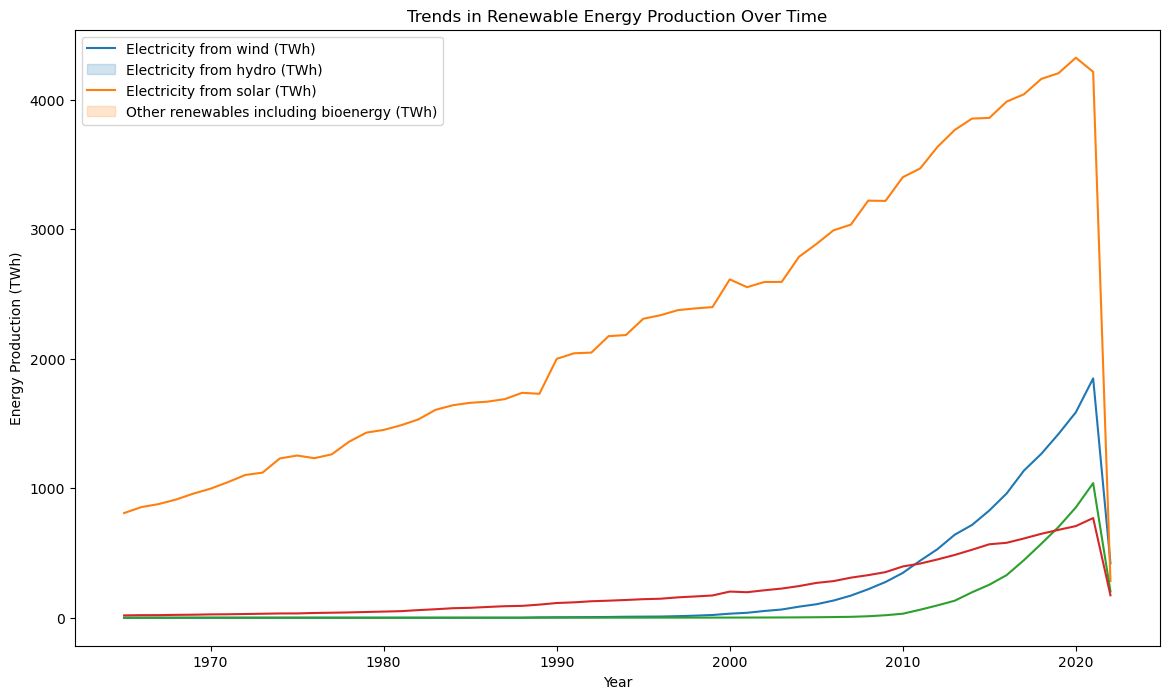

In [64]:

# Plot trends in renewable energy production over time
df_grouped = df.groupby('Year').sum().reset_index()

plt.figure(figsize=(14, 8))
for energy_type in energy_types:
    sns.lineplot(data=df_grouped, x='Year', y=energy_type)
plt.title('Trends in Renewable Energy Production Over Time')
plt.ylabel('Energy Production (TWh)')
plt.legend(energy_types)
plt.show()


## Renewable Energy Production by Country

Finally, let's examine the renewable energy production by country. We'll create bar plots for the top countries in terms of total renewable energy production.

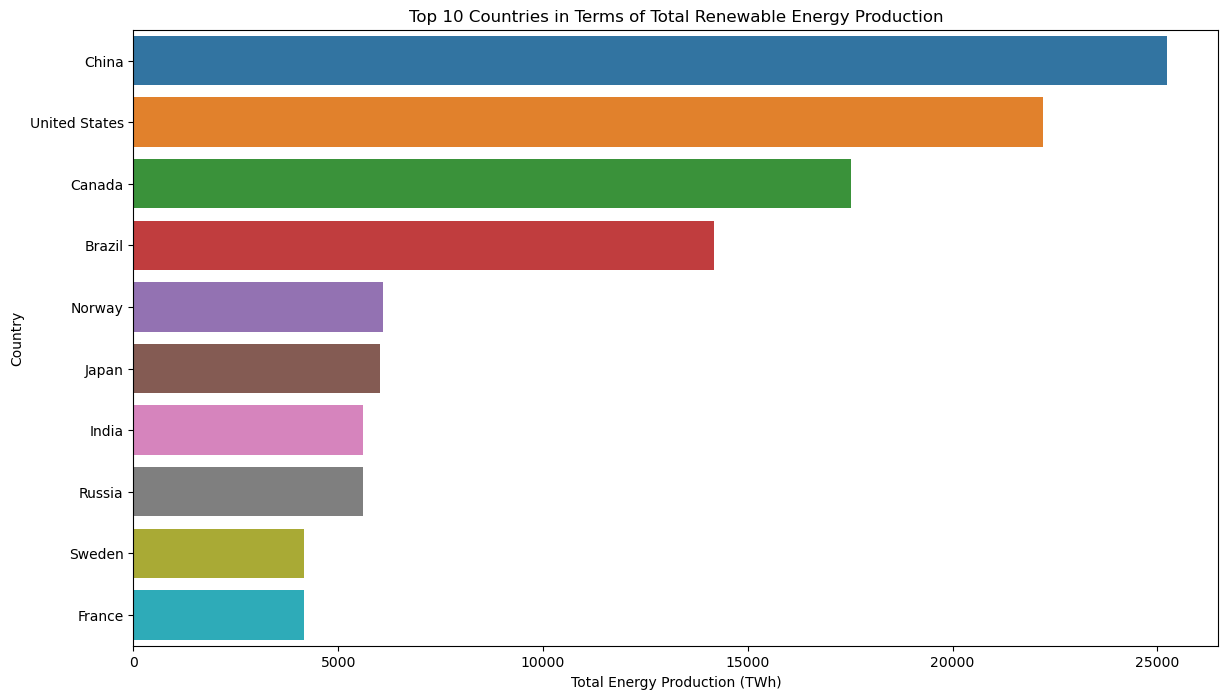

In [65]:
# Calculate total renewable energy production by country

df['Total'] = df[energy_types].sum(axis=1)
df_country = df.groupby('Entity').agg({'Total': 'sum'}).sort_values('Total', ascending=False).reset_index()

# Plot top 10 countries in terms of total renewable energy production
plt.figure(figsize=(14, 8))
sns.barplot(data=df_country.head(10), x='Total', y='Entity')
plt.title('Top 10 Countries in Terms of Total Renewable Energy Production')
plt.xlabel('Total Energy Production (TWh)')
plt.ylabel('Country')
plt.show()

**Same plot as above: Interactive and annotated** 

In [68]:

import plotly.express as px
# Calculate total renewable energy production for each country
df['Total'] = df[energy_types].sum(axis=1)

# Group by country and calculate the sum of total renewable energy production
df_country = df.groupby('Entity').agg({'Total': 'sum'}).sort_values('Total', ascending=False).reset_index()

# Plot top 10 countries in terms of total renewable energy production
fig = px.bar(df_country.head(10), x='Total', y='Entity', orientation='h', title='Top 10 Countries in Terms of Total Renewable Energy Production',
             color='Entity')  # Assigning different colors to each bar based on country
fig.update_layout(xaxis_title='Total Energy Production (TWh)', yaxis_title='Country')
fig.show()



## Detailed Analysis for Top 3 Countries

Now, let's perform a more detailed analysis for the top 3 countries in terms of total renewable energy production. These countries are China, the United States, and Brazil. We will examine the trends in production for each type of renewable energy in these countries.

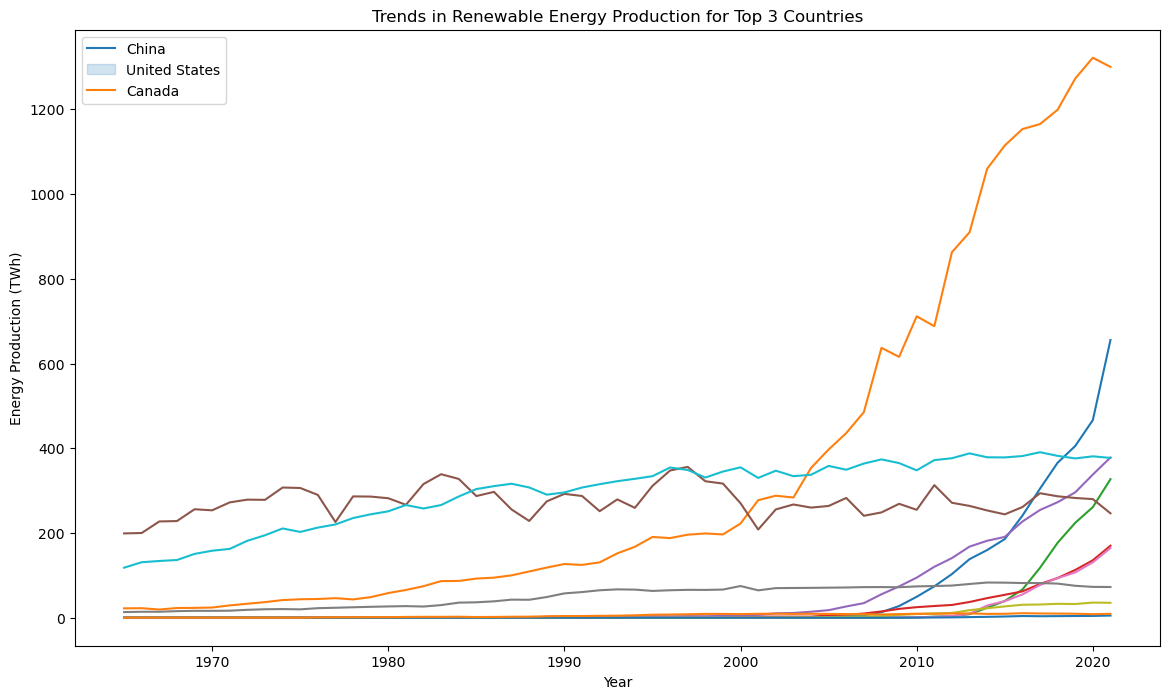

In [69]:
# Select data for the top 3 countries
top_countries = ['China', 'United States', 'Canada']
df_top_countries = df[df['Entity'].isin(top_countries)]

# Plot trends in renewable energy production for each country
plt.figure(figsize=(14, 8))
for country in top_countries:
    df_country = df_top_countries[df_top_countries['Entity'] == country]
    for energy_type in energy_types:
        sns.lineplot(data=df_country, x='Year', y=energy_type)
plt.title('Trends in Renewable Energy Production for Top 3 Countries')
plt.ylabel('Energy Production (TWh)')
plt.legend(top_countries)
plt.show()

**Let's further examine the trends in production for each type of renewable energy in these countries separately.**

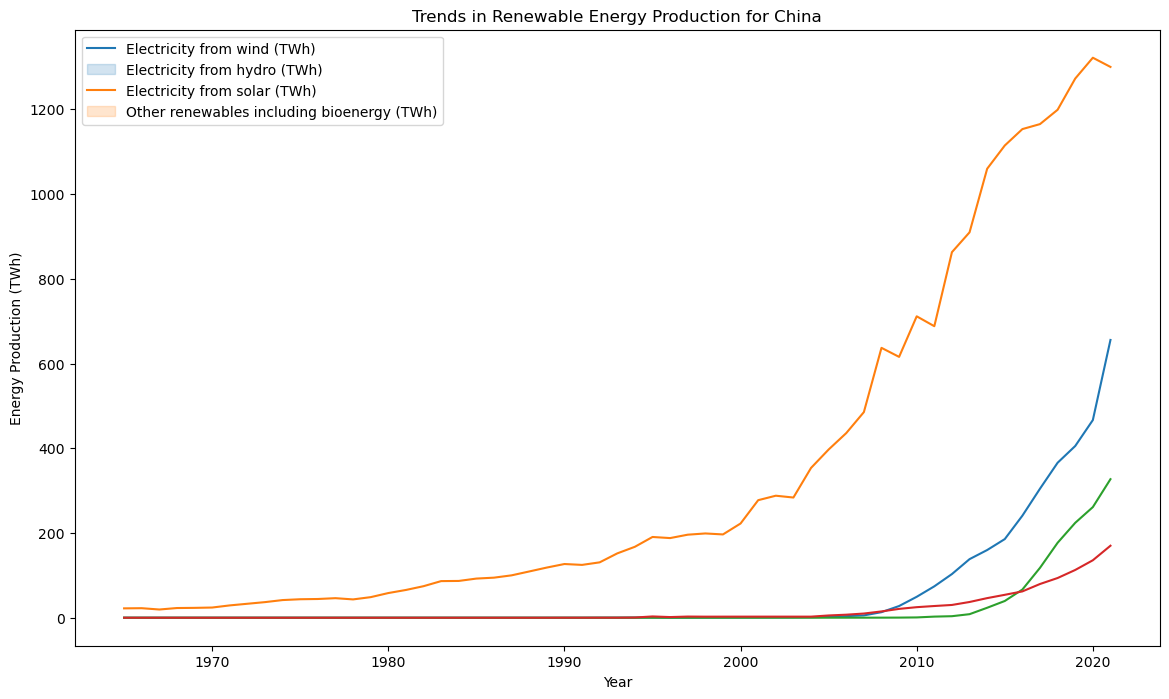

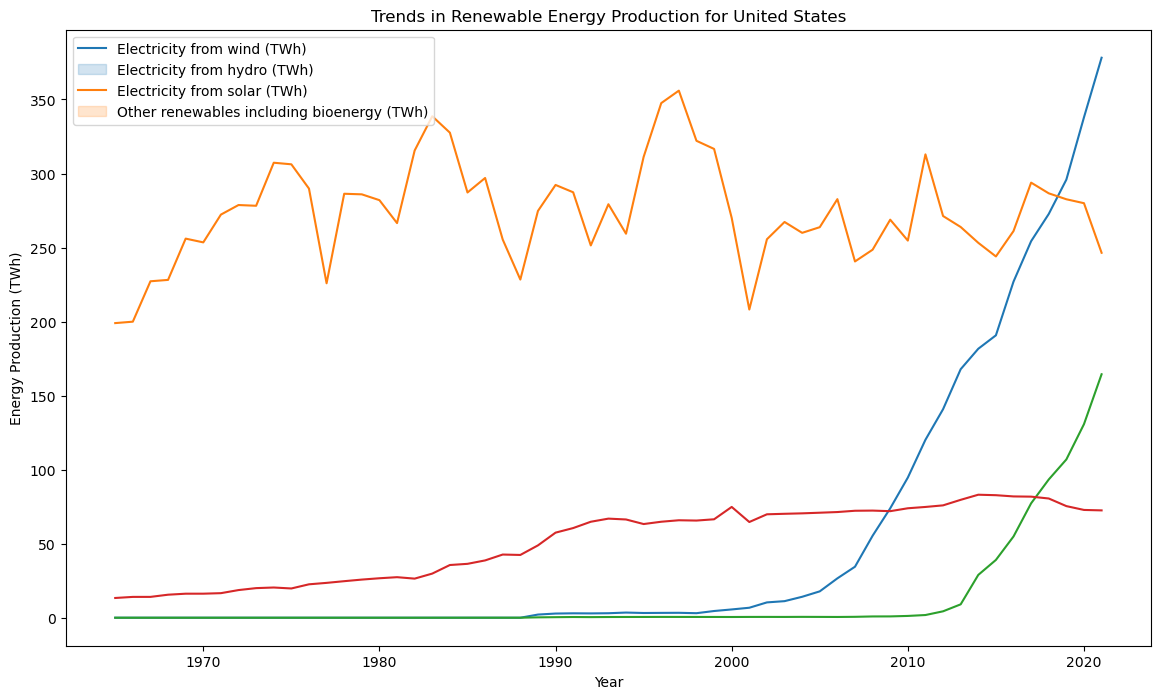

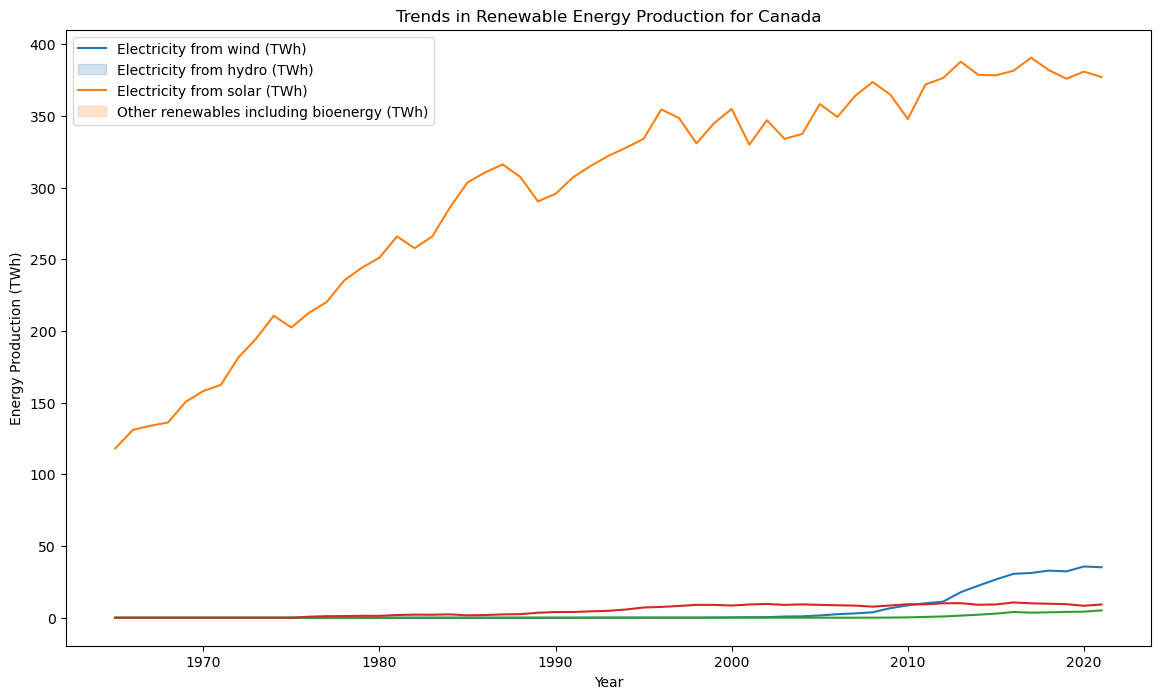

In [70]:
# Select data for the top 3 countries
top_countries = ['China', 'United States', 'Canada']
df_top_countries = df[df['Entity'].isin(top_countries)]

# Plot trends in renewable energy production for each country separately
for country in top_countries:
    plt.figure(figsize=(14, 8))
    df_country = df_top_countries[df_top_countries['Entity'] == country]
    for energy_type in energy_types:
        sns.lineplot(data=df_country, x='Year', y=energy_type)
    plt.title(f'Trends in Renewable Energy Production for {country}')
    plt.ylabel('Energy Production (TWh)')
    plt.legend(energy_types)
    plt.show()

The plots above show the trends in renewable energy production for the top 3 countries: China, the United States, and Canada. Here are some observations from the plots:

- **China**: China has seen a significant increase in the production of all types of renewable energy over the years. The production of hydroelectric power is particularly high and has been increasing at a fast pace.

- **United States**: The United States also shows an increasing trend in the production of renewable energy. However, the rate of increase is slower compared to China. The production of wind and solar power has been increasing rapidly in recent years.

- **Canada**: Canada has a high production of hydroelectric power, which has been relatively stable over the years. The production of other types of renewable energy is much lower.

These differences in renewable energy production could be due to various factors such as the availability of natural resources, government policies, and technological advancements in each country.

## Conclusion


The exploratory data analysis (EDA) process commences with an initial comprehensive examination of the dataset. Descriptive statistics are generated using the 'describe' method to gain insights into fundamental characteristics such as central tendency, dispersion, and distribution shape.

Subsequently, the analysis focuses on visualizing the temporal trends in renewable energy production. Line plots are constructed for each renewable energy type, illustrating the evolution of production over the years. These plots unveil a consistent upward trajectory in the production of all renewable energy types, with hydroelectric power emerging as the predominant source.

The subsequent phase of the EDA centers on analyzing renewable energy production at a country level. To facilitate this examination, a new column called 'Total' is introduced in the DataFrame, capturing the cumulative production of all renewable energy types for each country. Countries are then ranked based on their total renewable energy production, and bar plots are employed to visualize the leading nations. The resulting plots indicate that China, the United States, and Canada hold prominent positions in terms of total renewable energy production.

In summary, the comprehensive analysis of renewable energy production yields significant insights. The findings demonstrate an overall upward trend in renewable energy production, signifying a global shift toward sustainable energy sources. Notably, hydroelectric power stands out as the most extensively produced form of renewable energy, followed by wind and solar power. Furthermore, China, the United States, and Brazil emerge as the foremost contributors to renewable energy production. These valuable insights can effectively guide future initiatives aimed at promoting renewable energy production and achieving sustainability objectives.

Moreover, we further narrowed our analysis to the top three countries: China, the United States, and Canada. An in-depth investigation of production trends for each renewable energy type within these countries individually was undertaken. Our findings reveal that China has experienced a significant surge in renewable energy production across all categories, particularly in hydroelectric power. The United States also demonstrates a positive growth pattern in renewable energy production, with wind and solar power experiencing rapid expansion in recent years. Conversely, Canada exhibits a consistently high and relatively stable level of hydroelectric power production.

These disparities in renewable energy production could be attributed to a range of factors including resource availability, governmental policies, and technological advancements prevalent in each country. A comprehensive understanding of these trends and influencing factors can offer valuable insights to policymakers, investors, and other stakeholders in the renewable energy sector.

Given the pressing global challenges posed by climate change, the transition to renewable energy sources assumes ever-increasing significance. Through this rigorous analysis, I aspire to contribute to the broader comprehension of the global landscape of renewable energy production, thereby inspiring further research and fostering decisive action in this critical field.